## **00 Project Babynames-Part I: Generall Information**

**Intro**  
This was the first of the weekly projects of my DataScience Course at SPICED-Academy. The aim of the project was to teach Data Wrangling with Pandas and Data Visualization with matplotlib. Basic Calculations with Numpy and Pattern Matching with Regular Expressions were also applied. The data used in this project were baby names and their frequency of occurancy in the United States over time. The data was obtained from US Social Security Administration https://www.ssa.gov/oact/babynames/limits.html (This Dataset was also once part of a kaggle compatition. It can be found here https://www.kaggle.com/kaggle/us-baby-names/ .)
For this project I created two notebooks: 
The first shows a generell investigation of the data , e.g. distribution between Genders and Top Names, 
in the second my first name , Nicolas, or rather the different versions of if (e.g Nicholas, Nikolas, Nick, etc) was investigated. (It can be found here  ...#@Nic)

It should be noted that the website states "To safeguard privacy, we exclude from these files certain names that would indicate, or would allow the ability to determine, names with fewer than 5 occurrences in any geographic area."
 

**Read and write data**  
As seen here the data set consited ouf a .csv-file for every year, named yob (i.e. year of birth) and the year number. Therefore no preprocessing was needed. To inspect and get to know with the data structure we were asked to examine year 2000.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_2000 = pd.read_csv('yob2000.txt', names = ["FirstName","Sex","Count"])
df_2000.shape

(29769, 3)

In [2]:
df_2000.head(10)

,FirstName,Sex,Count
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


In [3]:
#Calculate total births
total_birth = df_2000['Count'].sum()
total_birth

3778079

Text(0.5, 1.0, 'Number of Male and Female Babies in 2000')

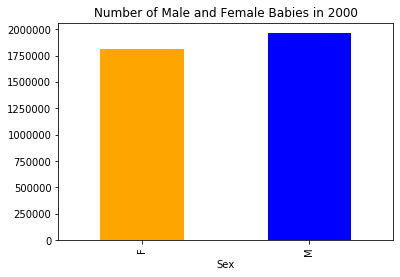

In [4]:
#Separate boys / girls
df_2000_sex = df_2000.groupby('Sex')[['Count']].sum()
df_2000_sex[('Count')].plot.bar(color =['orange', 'blue'])
plt.title('Number of Male and Female Babies in 2000')

**Frequent Names**   
Taking a deep dive into the most frequent names in the year 2000.

In [5]:
#Find names frequently occuring
df2000Greater1000 = df_2000[df_2000['Count']> 1000]
df2000Greater1000.shape

(617, 3)

In [6]:
#Relative amount and Percentage
TotalBirths = df_2000['Count'].sum()
df_2000['Frequency'] = (df_2000['Count']/TotalBirths)
df_2000['Percentage'] = (df_2000['Count']/TotalBirths)*100
df_2000.head(5) 

,FirstName,Sex,Count,Frequency,Percentage
0,Emily,F,25953,0.006869,0.686936
1,Hannah,F,23080,0.006109,0.610892
2,Madison,F,19967,0.005285,0.528496
3,Ashley,F,17997,0.004764,0.476353
4,Sarah,F,17697,0.004684,0.468413


In [7]:
# Verify that the sum of all percentages is 100%.
df_2000['Frequency'].sum(),  df_2000['Percentage'].sum() # 99.999999999999999 might be due to a floating point rounding error

(1.0, 99.99999999999999)

In [8]:
# Calculate the percentage of the top 10 names on all births
df_2000sorted = df_2000.sort_values(by=['Percentage'], ascending=False)
df_2000sorted.head(10)['Percentage'].sum()

7.085505623360444

In [9]:
#Search your name
df_2000sorted[df_2000sorted['FirstName'] == 'Nicolas']

,FirstName,Sex,Count,Frequency,Percentage
17789,Nicolas,M,2846,0.000753,0.075329
16833,Nicolas,F,5,0.000001,0.000132


Text(0.5, 1.0, 'Top Five Baby Names in 2000')

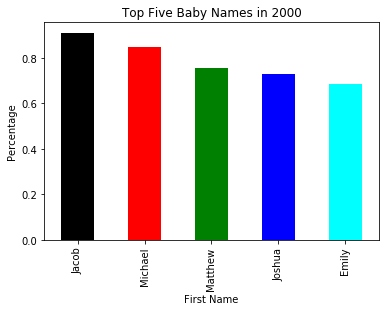

In [10]:
#Bar plot of Top Five Names
TopFive = df_2000sorted.iloc[0:5]
TopFiveName = TopFive.set_index('FirstName')
TopFiveName[('Percentage')].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('First Name')
plt.ylabel('Percentage')
plt.title('Top Five Baby Names in 2000')

**US Name Development 1880 - 2017**  
 To get information of all Births over time the entire data was read in and analysed regarding to gender, composition of and length of names. The time window available while taking the course was 1880 - 2017.

In [11]:
# Read in all Years
Years = range(1880, 2018, 1)
data = []
for y in Years:
    fn = f'yob{str(y)}.txt'
    df = pd.read_csv(fn, names = ["FirstName","Sex","Count"])
    df['Year'] = y
    data.append(df)
    
df = pd.concat(data,ignore_index = True)

# Create a DF for Male and for Female
df_m = df[df['Sex']== 'M']
df_f = df[df['Sex']== 'F']

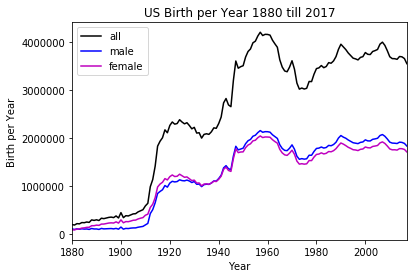

In [12]:
#Total births over time
baby_sum = df.groupby('Year')[['Count']].sum()
baby_sum_m = df_m.groupby('Year')[['Count']].sum()
baby_sum_f = df_f.groupby('Year')[['Count']].sum()
baby_sum.plot.line(c='k')

plt.plot(baby_sum_m.index, baby_sum_m['Count'].values, color='b')
plt.plot(baby_sum_f.index, baby_sum_f['Count'].values, color='m')
plt.xlabel('Year')
plt.ylabel('Birth per Year')
plt.title('US Birth per Year 1880 till 2017')
plt.legend(('all','male','female'))

Text(0.5, 1.0, 'Amount of Names over Time ')

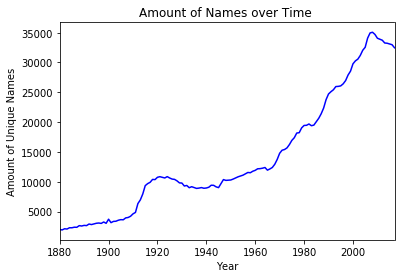

In [13]:
# Name diversity
diversity = df.groupby('Year')['FirstName'].size()
diversity.plot.line(c='b')
plt.xlabel('Year')
plt.ylabel('Amount of Unique Names')
plt.title('Amount of Names over Time ')

Looking at the graph above it seems that the diversity in names has increased. This could be due to the fact that the USA was a country of immigration. Immigrants form different regions of the world, bring different first names. Further, one should consider that some of the increase might be due to the fact that there are more "versions" of some names (e.g. Nicolas, Nicholas, Nikolas).

**Lenghty Names**

In [14]:
# Finding long names by creating a new column applying the len-fct and storting descending
df['Length'] = df['FirstName'].apply(len)
df.sort_values(by=['Length'], ascending=False).head(10)

,FirstName,Sex,Count,Year,Length
1273784,Christopherjame,M,6,1997,15
1485009,Christianmichae,M,5,2004,15
1011480,Mariadelosangel,F,7,1987,15
1331306,Christianjoseph,M,5,1999,15
1033393,Mariadelosangel,F,7,1988,15
939066,Christopherjohn,M,8,1983,15
1422999,Ryanchristopher,M,5,2002,15
1824466,Christopherjohn,M,5,2014,15
1143663,Christopherjohn,M,5,1992,15
1485010,Christopherdavi,M,5,2004,15


First one can see that the maximum lenght of names has increased over time

Text(0.5, 1.0, 'Longest Names over each Year')

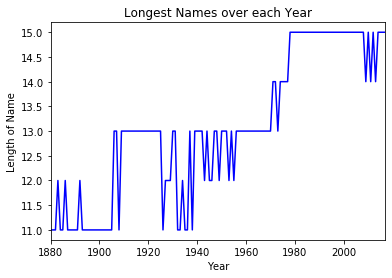

In [15]:
# Name diversity
MaxLength = df.groupby('Year')['Length'].max()
MaxLength.plot.line(c='b')
plt.xlabel('Year')
plt.ylabel('Length of Name')
plt.title('Longest Names over each Year')

In [16]:
MaxIdxLength = df.groupby('Year')['Length'].idxmax()
df.loc[MaxIdxLength]

,FirstName,Sex,Count,Year,Length
1083,Christopher,M,95,1880,11
3110,Christopher,M,68,1881,11
5117,Christopher,M,89,1882,11
6916,Francisquita,F,6,1883,12
9513,Christopher,M,68,1884,11
...,...,...,...,...,...
1767633,Mariaguadalupe,F,15,2013,14
1824466,Christopherjohn,M,5,2014,15
1856108,Christopherjame,M,6,2015,15
1890549,Christopherjame,M,5,2016,15


These long names which seem to be multiple concatinated names might also contribute to the increase in name diversity 

In [17]:
#add a new column category next to the age group. 
category = pd.cut(df.Length,bins=[1,10,17],labels=['Short','Long'])
df.insert(5,'Len Group',category)
df.head()

,FirstName,Sex,Count,Year,Length,Len Group
0,Mary,F,7065,1880,4,Short
1,Anna,F,2604,1880,4,Short
2,Emma,F,2003,1880,4,Short
3,Elizabeth,F,1939,1880,9,Short
4,Minnie,F,1746,1880,6,Short


Text(0.5, 1.0, 'Amount of Names over Time ')

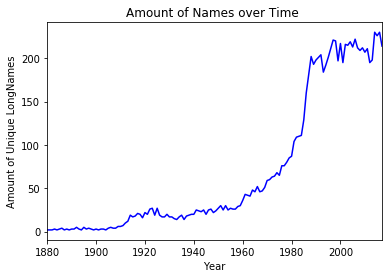

In [18]:
dfLongNames = df[df['Len Group']=='Long']
dfLongNames2 = dfLongNames.groupby('Year')['FirstName'].size()
dfLongNames2.plot.line(c='b')
plt.xlabel('Year')
plt.ylabel('Amount of Unique LongNames')
plt.title('Amount of Names over Time ')

Looking at the Y-axis, one may see that the influence on the the increase of name diversity from the 1960ies by Lengthy names is insignificant.

**First letter statistics**

This section investigates the development of the distribution of the first letter of names over time.

In [19]:
# Creating a function to obtain first letter 
def FirstLetter(m):
    return m[0]

In [20]:
#Finding the overall amount of each name and first letters
diversity = df.groupby('FirstName').sum()
diversity2 = diversity.reset_index()
diversity2.head(5)  #Note that Columns 'Years' and 'Lenght' are not meaningful, as they are also summend (e.g. Aadib, seems to occure in two years that add up to 4019 (could be 2014 and 2015))

,FirstName,Count,Year,Length
0,Aaban,107,20124,50
1,Aabha,35,10068,25
2,Aabid,10,4019,10
3,Aabir,5,2016,5
4,Aabriella,32,10070,45


In [21]:
diversity2['First Letter'] = diversity2['FirstName'].apply(FirstLetter)
diversity2.head(5)

,FirstName,Count,Year,Length,First Letter
0,Aaban,107,20124,50,A
1,Aabha,35,10068,25,A
2,Aabid,10,4019,10,A
3,Aabir,5,2016,5,A
4,Aabriella,32,10070,45,A


In [22]:
#Total amount of Names staring with each letter 
FirstLetterTotal = diversity2.groupby('First Letter').size()
#Starting with A:
FirstLetterTotal[0]

10292

To find Frequency and Percentage of each First Letter per Year over time:
- Numerator = amount of each First Letter per year
- Denominator = total number of babies per year

In [23]:
# Numerator = amount of each First Letter per year
df['First Letter'] = df['FirstName'].apply(FirstLetter)
df.sort_values(by=['FirstName'], ascending=True).head(5)
diversity3 = df.sort_values(by=['Year','First Letter'], ascending=[True,True] )
diversity3.head(5)

,FirstName,Sex,Count,Year,Length,Len Group,First Letter
1,Anna,F,2604,1880,4,Short,A
7,Alice,F,1414,1880,5,Short,A
10,Annie,F,1258,1880,5,Short,A
32,Ada,F,652,1880,3,Short,A
53,Agnes,F,473,1880,5,Short,A


In [24]:
diversity4 = diversity3.groupby(['Year','First Letter'])[['Count']].sum()
diversity4.reset_index()
diversity5 = diversity4.sort_values(['First Letter','Year'], ascending=True)
diversity5.reset_index(inplace = True)
diversity5.head(5)

,Year,First Letter,Count
0,1880,A,16740
1,1881,A,16257
2,1882,A,18790
3,1883,A,18831
4,1884,A,20898


In [25]:
# Numerator = get each letter per year
baby_sum.reset_index(inplace = True)
baby_sum.head()


,Year,Count
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462


In [26]:
#baby_sum.reset_index(inplace = True) # get the totel amount of birth each year
rel_baby = pd.merge(diversity5,baby_sum, how = 'left', on ='Year')
rel_baby['Frequency'] = (rel_baby['Count_x']/rel_baby['Count_y']) 
rel_baby['Percentage'] = (rel_baby['Count_x']/rel_baby['Count_y'])*100 
# Note taht Count_x refers to the occurance of the letter in a given year, while Count_y is the total number of babies in a given year
rel_baby.head(5)

,Year,First Letter,Count_x,Count_y,Frequency,Percentage
0,1880,A,16740,201484,0.083084,8.308352
1,1881,A,16257,192696,0.084366,8.436605
2,1882,A,18790,221533,0.084818,8.481806
3,1883,A,18831,216946,0.086800,8.680040
4,1884,A,20898,243462,0.085837,8.583680


To be able to to see how the varies over the year a the volatility measured as the Standard Deviation as measured and the set was split into three groups of Volatilit. Further the share of   descriptive statistics

In [27]:
import numpy
import string

Alphabet = list(string.ascii_uppercase)
#The problem encountered here is that in some Years there no babies named a name starting with X
Alphabet = Alphabet[0:23] + Alphabet[24:26 ] # Therefore X was simply excluded.
StdDiv_Vector = []
VolatilityDict = {}

for i in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == i]
    StdDiv = numpy.std(InitialsOverTime['Frequency'].values) #"@Nic"
    VolatilityDict[i]=StdDiv

VolDF = pd.DataFrame(list(VolatilityDict.items()),columns = ['Letter', 'Volatility'])
Vol_sort = VolDF.sort_values('Volatility')

In [28]:
#Splitting Set into three groups
Vol_sort_low = Vol_sort[0:8]
Vol_sort_medium = Vol_sort[8:17]
Vol_sort_high = Vol_sort[17:]

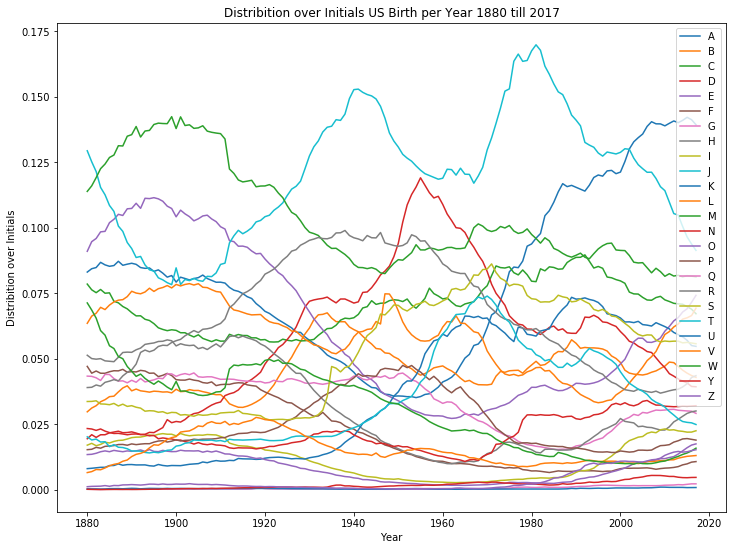

In [29]:
plt.figure(figsize=(12,9) )
for x in Alphabet: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['Year'], InitialsOverTime['Frequency'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials')
#plt.axis([ 1880, 2020,0, 16])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017')
plt.legend(Alphabet)


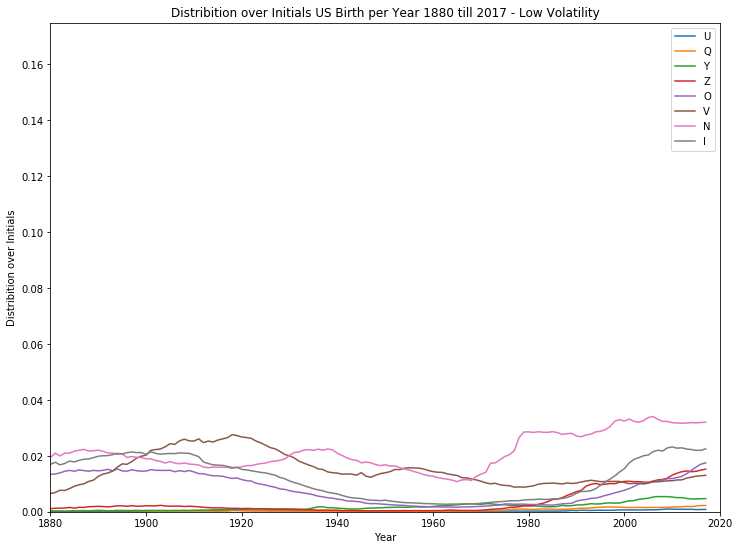

In [30]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_low['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['Year'], InitialsOverTime['Frequency'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials')
plt.axis([ 1880, 2020,0, .175])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - Low Volatility')
plt.legend(Vol_sort_low['Letter'])
#plt.savefig('Distribition over Initials US Birth per Year 1880 till 2017')

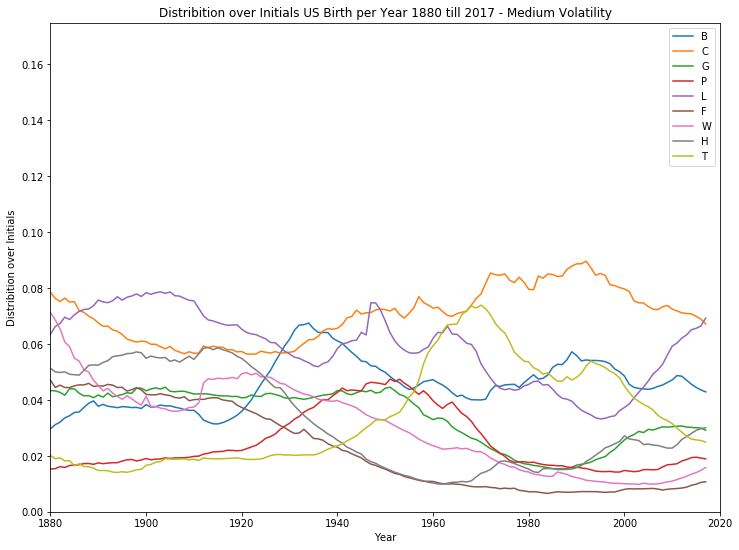

In [31]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_medium['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['Year'], InitialsOverTime['Frequency'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials')
plt.axis([ 1880, 2020,0, 0.175])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - Medium Volatility')
plt.legend(Vol_sort_medium['Letter'])

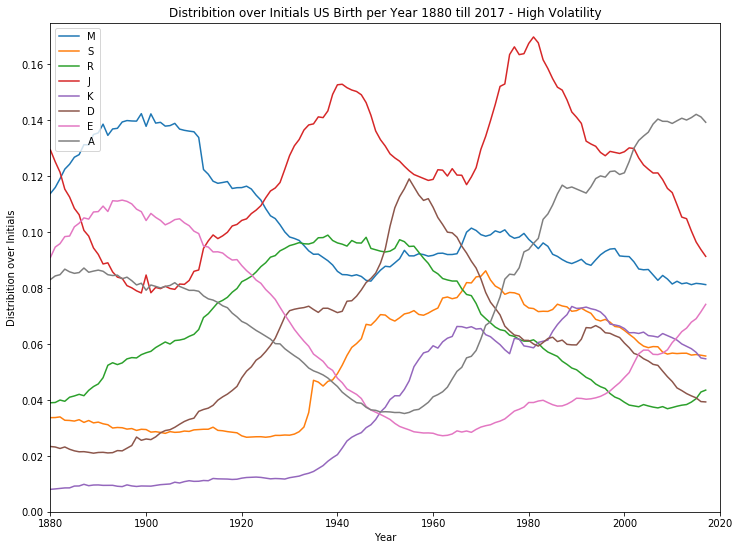

In [32]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_high['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['Year'], InitialsOverTime['Frequency'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials')
plt.axis([ 1880, 2020,0, 0.175])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - High Volatility')
plt.legend(Vol_sort_high['Letter'])

In [33]:
# Getting Mean and Maximum for each letter
import numpy as np
#note that 
MeanVec = []
for x in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    Mean = np.mean(InitialsOverTime['Frequency'].values)
    MeanVec.append(Mean)
#create vector     
VolDF['Average'] = MeanVec

MaxVec = []
for x in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    Max = np.max(InitialsOverTime['Frequency'].values)
    MaxVec.append(Max)
    
VolDF['Max'] = MaxVec
VolDF

,Letter,Volatility,Average,Max
0,A,0.031858,0.080701,0.142168
1,B,0.008885,0.045652,0.067514
2,C,0.009570,0.070381,0.089658
3,D,0.026039,0.058944,0.119081
4,E,0.028757,0.062925,0.111489
5,F,0.015030,0.022596,0.047081
6,G,0.009781,0.034372,0.044579
7,H,0.017172,0.032028,0.058795
8,I,0.007332,0.012056,0.023199
9,J,0.024035,0.120201,0.169853


Note that while a non-low Max-Value is necessary for a high volatility this dues not hold the other way around, that is to say a initial letter could have a constant value of e.g. 12% over each year and would thus have a high Max and Average value, but a low volatility.

#np.correlate(VolDF['Volatility'],VolDF['Average'],VolDF['Max'])

In [34]:
VolDF.corr()

,Volatility,Average,Max
Volatility,1.000000,0.741336,0.868747
Average,0.741336,1.000000,0.967058
Max,0.868747,0.967058,1.000000


**Last Letter and E-rich Names**

Finally we were ased to give descriptive statistics on last letter and names containing an E

In [35]:
# Last letter statistics

def LastLetter(m):
    return m[-1]

LastLetter('abcde')
df['Last Letter'] = df['FirstName'].apply(LastLetter)
df.sort_values(by=['Last Letter'] , ascending=True).head(5)

,FirstName,Sex,Count,Year,Length,Len Group,First Letter,Last Letter
962332,Francisca,F,153,1985,9,Short,F,a
444769,Virgina,F,11,1948,7,Short,V,a
1126626,Hera,F,12,1992,4,Short,H,a
1126625,Haya,F,12,1992,4,Short,H,a
1126624,Haruka,F,12,1992,6,Short,H,a


In [36]:
# e-rich Names
def CountNumberOfE(a):
    p = a.count('E')
    o = a.count('e')
    ##Eevector = ['E' ,'e']
    #Eevector2 = '|'.join(Eevector)
    return p + o

diversity2['NumberOfE'] = diversity2['FirstName'].apply(CountNumberOfE)
Min4E = diversity2[diversity2['NumberOfE']>3]
len(Min4E)

136